# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_name = df.columns.values.tolist()
column_name

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_name].join(dummy_gender)
column_name = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [9]:
df_new = df_new[column_name].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [11]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [12]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [13]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137453
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [14]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.154946125495895),
 ('Gender_Female', -131.02501325554584),
 ('Gender_Male', 131.02501325554596),
 ('City_Tier 1', 76.76432601049525),
 ('City_Tier 2', 55.13897430923255),
 ('City_Tier 3', -131.90330031972792),
 ('Record', 772.2334457445648)]

In [15]:
lm.score(X,Y)

0.9179923586131016

### El modelo pude ser escrito como:
Total_Spend = -79.41713030137453 + 'Monthly Income' * 0.14753898049205744 + 'Transaction Time' * 0.154946125495895 + 
            'Gender_Female' * -131.02501325554584 + 'Gender_Male' * 131.02501325554596 +
            'City_Tier 1' * 76.76432601049525 + 'City_Tier 2' * 55.13897430923255 + 'City_Tier 3' * -131.90330031972792 +
            'Record' * 772.2334457445648

In [16]:
df_new["prediction"] = -79.41713030137453 + df_new['Monthly Income'] * 0.14753898049205744 + df_new['Transaction Time'] * 0.154946125495895 + df_new['Gender_Female'] * -131.02501325554584 + df_new['Gender_Male'] * 131.02501325554596 + df_new['City_Tier 1'] * 76.76432601049525 + df_new['City_Tier 2'] * 55.13897430923255 + df_new['City_Tier 3'] * -131.90330031972792 + df_new['Record'] * 772.2334457445648

In [17]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [18]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.340816

In [19]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [20]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [21]:
error = RSE/sales_mean
error

0.13031135680294162

In [22]:
error * 100

13.031135680294161

In [23]:
df_new["prediction2"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [24]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction,prediction2
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


## Eliminar variables dummy redundantes

In [25]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [26]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [27]:
column_name = df.columns.values.tolist()
df_new = df[column_name].join(dummy_gender)
column_name = df_new.columns.values.tolist()
df_new = df_new[column_name].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [28]:
feature_cols =["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [29]:
print(lm.intercept_)

-133.67781754642238


In [30]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205746),
 ('Transaction Time', 0.1549461254958972),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126301),
 ('City_Tier 3', -208.66762633022316),
 ('Record', 772.2334457445637)]

In [31]:
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0,3581.980335


## Transformación de variables para conseguir una relación no lineal

In [32]:
import pandas as pd

In [34]:
data_auto = pd.read_csv("datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [36]:
data_auto.shape

(406, 9)

In [37]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

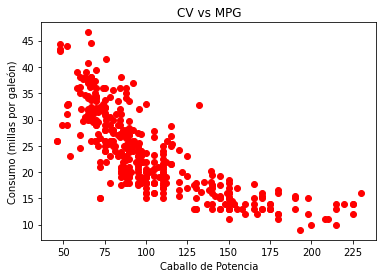

In [40]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballo de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

In [48]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

<ipython-input-48-68f2d38f7665>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X[:, np.newaxis]


In [51]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [44]:
type(X)

pandas.core.series.Series

In [50]:
type(X_data)

numpy.ndarray

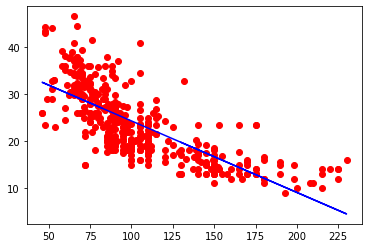

In [49]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X_data), "blue")

In [52]:
lm.score(X_data, Y)

0.574653340645025

In [81]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
Y_mean = np.mean(Y)
error = RSE/Y_mean
SSD, RSE, Y_mean, error

(8373.171393636556, 4.546921735442387, 23.51457286432162, 0.19336612073193882)

In [82]:
X_data

array([[1.00000000e+00, 1.30000000e+02, 1.69000000e+04, 2.19700000e+06,
        2.85610000e+08, 3.71293000e+10],
       [1.00000000e+00, 1.65000000e+02, 2.72250000e+04, 4.49212500e+06,
        7.41200625e+08, 1.22298103e+11],
       [1.00000000e+00, 1.50000000e+02, 2.25000000e+04, 3.37500000e+06,
        5.06250000e+08, 7.59375000e+10],
       ...,
       [1.00000000e+00, 8.40000000e+01, 7.05600000e+03, 5.92704000e+05,
        4.97871360e+07, 4.18211942e+09],
       [1.00000000e+00, 7.90000000e+01, 6.24100000e+03, 4.93039000e+05,
        3.89500810e+07, 3.07705640e+09],
       [1.00000000e+00, 8.20000000e+01, 6.72400000e+03, 5.51368000e+05,
        4.52121760e+07, 3.70739843e+09]])

### Modelo de regresión lineal y cuadratico
* mpg = a + b horsepower + c horsepower^2

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [60]:
poly = PolynomialFeatures(degree=2)

In [62]:
X_data = poly.fit_transform(X[:,np.newaxis])

<ipython-input-62-9fe0cf666176>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])


In [63]:
lm = linear_model.LinearRegression()

In [64]:
lm.fit(X_data, Y)

LinearRegression()

In [65]:
lm.score(X_data, Y)

0.6439066584257469

In [66]:
lm.intercept_

55.026192447080355

In [67]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 -0.434hp + 0.00112615 hp ^ 2

In [77]:
def regresion_validacion(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    Y_mean = np.mean(Y)
    error = RSE/Y_mean
    print(SSD, RSE, Y_mean, error)

In [80]:
for d in range(2, 6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+ str(d))
    print(lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validacion(X_data, Y, lm.predict(X_data))
    print("-------------------------------------------")

Regresión de grado 2
0.6439066584257469
55.026192447080355
[ 0.         -0.43404318  0.00112615]
8636.180643524502 4.61778115803654 23.51457286432162 0.1963795466190689
-------------------------------------------
Regresión de grado 3
0.6444678885560744
58.448774111918084
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
8622.56936742855 4.614140736300908 23.51457286432162 0.19622473106036675
-------------------------------------------
Regresión de grado 4
0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
8566.799832491353 4.5991947315797574 23.51457286432162 0.19558912501268777
-------------------------------------------
Regresión de grado 5
0.6547512489366876
-40.693812896755176
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
8373.171393636556 4.546921735442387 23.51457286432162 0.19336612073193882
-------------------------------------------


<ipython-input-80-e1f23cb0196a>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-80-e1f23cb0196a>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-80-e1f23cb0196a>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-80-e1f23cb0196a>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexi

## El problema de los outliers

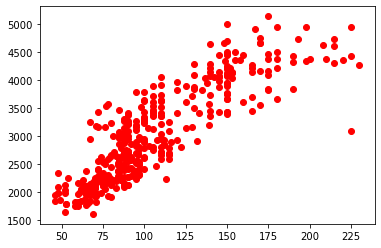

In [83]:
plt.plot(data_auto["horsepower"], data_auto["weight"], "ro")

In [85]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

<ipython-input-85-d7b6c72df5b6>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


LinearRegression()

In [87]:
lm.score(X, Y)

0.6261049762826918

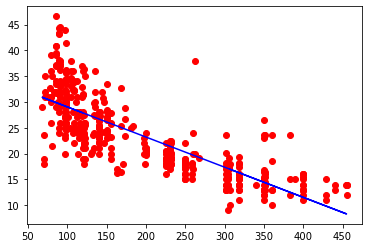

In [88]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [92]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [93]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [94]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [96]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

<ipython-input-96-d26b1722a41a>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


LinearRegression()

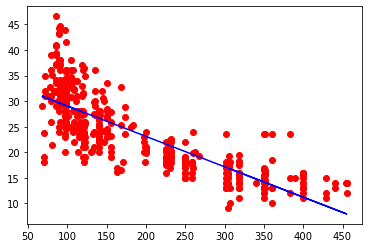

In [97]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [99]:
lm.score(X,Y)

0.6466514317531822